# 환경 셋팅

In [4]:
!pip install numpy
!pip install pandas
!pip install yfinance
!pip install quantstats
!pip install finance-datareader
!pip install PyPortfolioOpt
!pip install pulp
!pip install pandas-datareader
!pip install streamlit

# 글꼴 설치
!apt -qq install fonts-nanum*

  Using cached QuantStats-0.0.59-py2.py3-none-any.whl (41 kB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 8.8 MB/s eta 0:00:000m eta 0:00:010:00:01
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
  Using cached pyportfolioopt-1.5.3-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 9.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.5/249.5 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.4 MB/s eta 0:00:00
  Using cached PuLP-2.6.0-py3-none-any.whl (14.2 MB)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
zsh:1: no matches fo

In [5]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import FinanceDataReader as fdr
from backdata import tickers

ImportError: cannot import name 'tickers' from 'backdata' (/Users/sunlee/Develop/Stock-Portfolio-Optimization/backdata.py)

# Trading

## quantsstats를 이용한 포트폴리오 심층분석

In [4]:
stock = qs.utils.download_returns('TQQQ')
stock

Date
2010-02-11         NaN
2010-02-12    0.004094
2010-02-16    0.038734
2010-02-17    0.016970
2010-02-18    0.018958
                ...   
2022-09-13   -0.164565
2022-09-14    0.022446
2022-09-15   -0.050341
2022-09-16   -0.019530
2022-09-19    0.023984
Name: Close, Length: 3173, dtype: float64

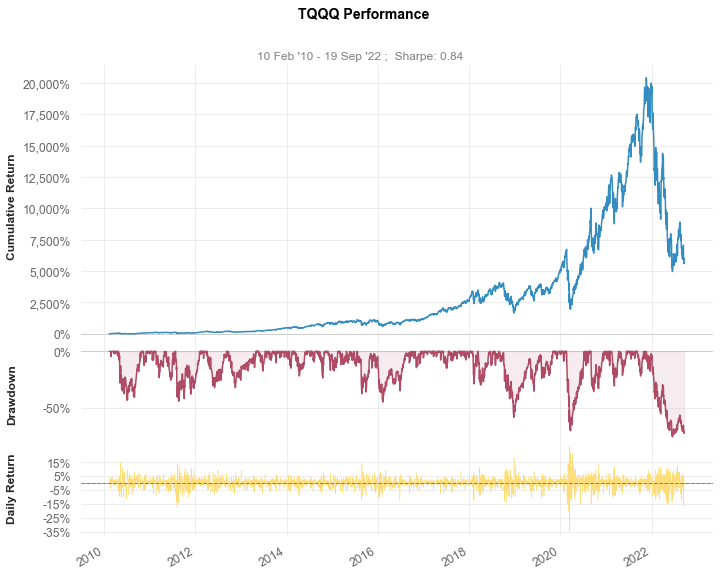

In [5]:
qs.plots.snapshot(stock, title='TQQQ Performance')

In [6]:
qs.reports.metrics(stock, mode ='basic')

                    Strategy
------------------  ----------
Start Period        2010-02-11
End Period          2022-09-19
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   5,738.17%
CAGR﹪              38.06%

Sharpe              0.84
Prob. Sharpe Ratio  99.84%
Sortino             1.17
Sortino/√2          0.83
Omega               1.17

Max Drawdown        -75.32%
Longest DD Days     431

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.08

Payoff Ratio        0.92
Profit Factor       1.17
Common Sense Ratio  1.09
CPC Index           0.6
Tail Ratio          0.93
Outlier Win Ratio   3.97
Outlier Loss Ratio  4.1

MTD                 -9.42%
3M                  11.12%
6M                  -52.62%
YTD                 -69.71%
1Y                  -64.58%
3Y (ann.)           16.87%
5Y (ann.)           20.25%
10Y (ann.)          34.03%
All-time (ann.)     38.06%

Avg. Drawdown       -6.89%
Avg. Drawdown Days  23
Recovery Factor     76.18
Ulcer Index         0.21
Serenity Index

## yfinance를 사용하여 종목 데이터 가져오기

In [7]:
usdkrw = yf.download(['USDKRW=X'],start='1991-01-01', end='2022-09-17')
usdkrw['Close']

[*********************100%***********************]  1 of 1 completed


Date
2003-12-01    1198.400024
2003-12-02    1195.000000
2003-12-03    1192.500000
2003-12-04    1190.099976
2003-12-05    1184.699951
                 ...     
2022-09-12    1379.060059
2022-09-13    1375.810059
2022-09-14    1393.469971
2022-09-15    1391.180054
2022-09-16    1398.630005
Name: Close, Length: 4874, dtype: float64

<AxesSubplot:xlabel='Date'>

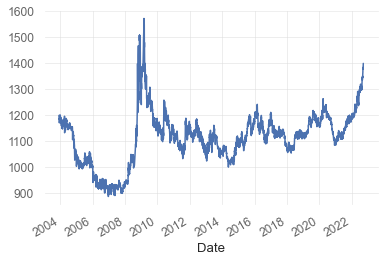

In [8]:
usdkrw['Close'].plot()

[*********************100%***********************]  1 of 1 completed


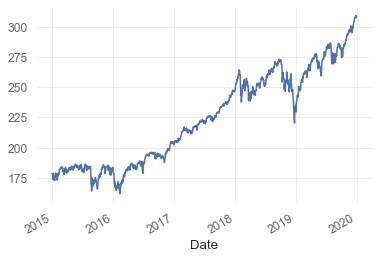

In [9]:
spy = yf.download('SPY','2015-01-01','2020-01-01')
spy["Adj Close"].plot()
plt.show()

[*********************100%***********************]  1 of 1 completed


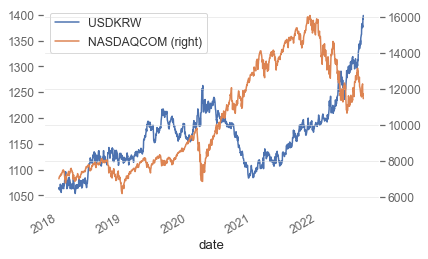

In [25]:
# 환율 VS. 나스닥
df_usdkrw = yf.download(['USDKRW=X'], start='2018-01-01')
df_nasdaq = fdr.DataReader(['NASDAQCOM'], start='2018-01-01', data_source='fred')
df_usdkrw.reset_index(inplace=True)
df_nasdaq.reset_index(inplace=True)
df_usdkrw['date'] = pd.to_datetime(df_usdkrw['Date'])
df_nasdaq['date'] = pd.to_datetime(df_nasdaq['DATE'])

df_usdkrw.drop(labels=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_nasdaq.drop(labels=['DATE'], axis=1, inplace=True)

df = pd.merge(df_usdkrw, df_nasdaq, on='date')
df.rename(columns = {'Close' : 'USDKRW'}, inplace=True)
df.set_index('date', inplace=True)

ax = df.plot(secondary_y='NASDAQCOM')

In [7]:
from fredapi import Fred
from backdata import continued_claims

ModuleNotFoundError: No module named 'fredapi'

[*********************100%***********************]  1 of 1 completed


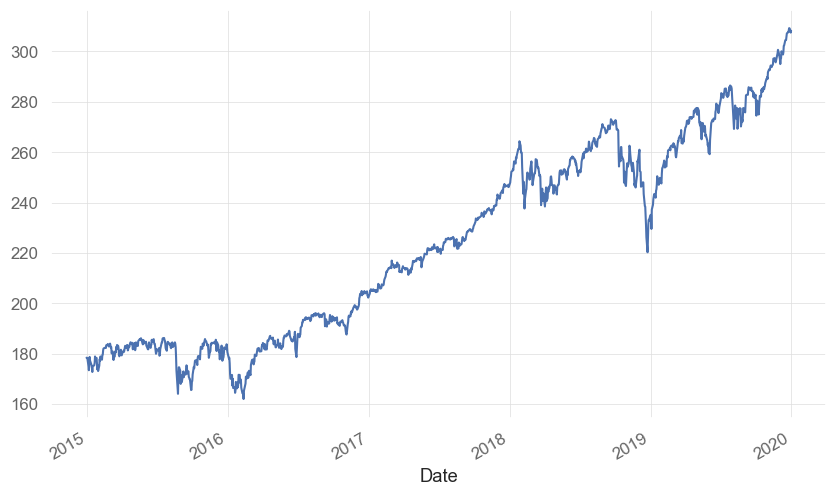

In [7]:
spy = yf.download('SPY','2015-01-01','2020-01-01')
spy["Adj Close"].plot()
plt.show()

[*********************100%***********************]  2 of 2 completed


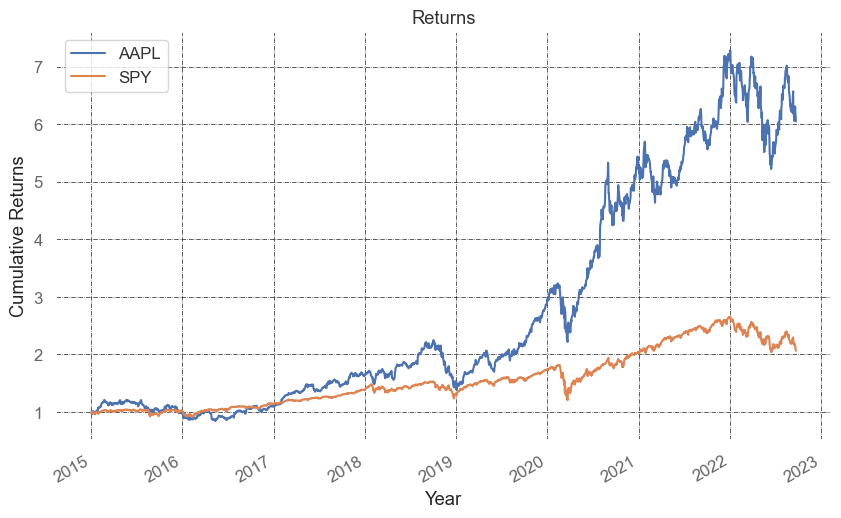

In [8]:
tickers_list = ['AAPL', 'SPY']
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Plot all the close prices
((data.pct_change()+1).cumprod()).plot()

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns")

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns')
plt.xlabel('Year')

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

In [11]:
import pandas as pd
import altair as alt
from pandas_datareader import data

def get_stock_df(symbol,start,end):
   source = 'yahoo'
   df = data.DataReader(
      symbol, start=start, end=end, data_source=source
   )
   return df

def get_stock_combined(symbols,start,end):
   dfs = []
   for symbol in symbols.keys():
      df = get_stock_df(symbol,start,end)
      df['Symbol'] = symbol
      df['SymbolFullName'] = symbols[symbol]
      dfs.append(df)
   df_combined = pd.concat(dfs, axis=0)
   df_combined['date'] = df_combined.index.values
   return df_combined


def get_stock_title(stocks):
   title = ""
   idx = 0

   for i in stocks.keys():
      title = title + stocks[i]

      if idx <  len(stocks.keys()) - 1:
         title = title + " & "
      idx = idx + 1

   return title

stocks = {"LIT":"Lithium","USO":"United States Oil ETF","UNG":"Natural Gas Fund","USL":"US 12 Month Natural Gas Fund (UNL)"}
stock_title = get_stock_title(stocks)
start = '2021-06-01'
end = '2022-08-01'

df_combined = get_stock_combined(stocks,start,end)
df_combined

,High,Low,Open,Close,Volume,Adj Close,Symbol,SymbolFullName,date
Date,,,,,,,,,
2021-06-01,68.279999,67.470001,67.500000,67.919998,904000.0,67.711342,LIT,Lithium,2021-06-01
2021-06-02,68.199997,67.779999,68.070000,68.199997,607700.0,67.990479,LIT,Lithium,2021-06-02
2021-06-03,67.580002,66.809998,67.580002,67.139999,750600.0,66.933739,LIT,Lithium,2021-06-03
2021-06-04,69.180000,67.900002,68.059998,69.120003,690300.0,68.907654,LIT,Lithium,2021-06-04
2021-06-07,68.930000,68.080002,68.699997,68.669998,790900.0,68.459038,LIT,Lithium,2021-06-07
...,...,...,...,...,...,...,...,...,...
2022-07-26,38.369999,37.270000,38.000000,37.360001,65700.0,37.360001,USL,US 12 Month Natural Gas Fund (UNL),2022-07-26
2022-07-27,38.849998,37.599998,37.770000,38.730000,43900.0,38.730000,USL,US 12 Month Natural Gas Fund (UNL),2022-07-27
2022-07-28,39.020000,38.090000,39.020000,38.400002,24100.0,38.400002,USL,US 12 Month Natural Gas Fund (UNL),2022-07-28
